<a href="https://colab.research.google.com/github/nitrogenlab/oceanography_colab_notebooks/blob/master/for_nicole/NicolePumpDataInvestigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We begin by downloading Nicole's dataset, which I've uploaded to Google Drive

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WYbLYFdfx3ZxXGqxiVDqnadtG9eO0o0u' -O PPS_Station_Data_and_Predictions_021221.csv

--2021-02-16 18:35:42--  https://docs.google.com/uc?export=download&id=1WYbLYFdfx3ZxXGqxiVDqnadtG9eO0o0u
Resolving docs.google.com (docs.google.com)... 74.125.137.102, 74.125.137.113, 74.125.137.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hn8d0cp5op1i0h0p2dh2bers14nhmupl/1613500500000/00395683668588961264/*/1WYbLYFdfx3ZxXGqxiVDqnadtG9eO0o0u?e=download [following]
--2021-02-16 18:35:44--  https://doc-14-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hn8d0cp5op1i0h0p2dh2bers14nhmupl/1613500500000/00395683668588961264/*/1WYbLYFdfx3ZxXGqxiVDqnadtG9eO0o0u?e=download
Resolving doc-14-50-docs.googleusercontent.com (doc-14-50-docs.googleusercontent.com)... 172.217.3.1, 2607:f8b0:4026:800::2001
Connecting to doc-14-50-docs.googleusercontent.com (doc-14-50-do

Let's load in specific columns from the dataset into a pandas data frame

In [3]:
import pandas as pd
import numpy as np

cols = ["Date", "Time", "Depth", "Station", "TempC", "Salinity",
        "Chl_SP", "pPAR", "NO3",
        "NO2", "NH4", "pH", "Oxygen", "predicted_St_NO2_oldfit"]
#Drop columns that have na values
df = pd.read_csv("PPS_Station_Data_and_Predictions_021221.csv")[cols].dropna()
#Set negative NO2 values to be 0
df["NO2"] = np.maximum(df["NO2"],0)
print("Rows:", len(df)) #print the number of rows in the data frame
df #preview the data frame

Rows: 74359


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Date      Time    Depth  ...     pH      Oxygen  predicted_St_NO2_oldfit
30      3/31/16  18:02:24    2.225  ...  8.057  228.970248                 0.117078
32      3/31/16  18:02:26    1.904  ...  8.057  228.880926                 0.125511
36      3/31/16  18:02:30    2.251  ...  8.057  228.949704                 0.108655
38      3/31/16  18:02:32    2.198  ...  8.057  228.675932                 0.101785
40      3/31/16  18:02:34    1.648  ...  8.057  228.451734                 0.120458
...         ...       ...      ...  ...    ...         ...                      ...
133670  4/21/16  16:51:34  348.062  ...  7.353    1.018271                 0.001938
133671  4/21/16  16:51:35  348.413  ...  7.353    1.030776                 0.001947
133672  4/21/16  16:51:36  348.886  ...  7.353    1.039261                 0.001955
133673  4/21/16  16:51:37  349.332  ...  7.353    1.078563                 0.001962
133674  4/21/16  16:51:38  349.635  ...  7.353    0.984328                 0.001962

[74359 rows x 14 columns]

Let's generate a scatterplot of predicted vs true values. We filter for points where Oxygen > 3 in order to restrict analysis to the PNM

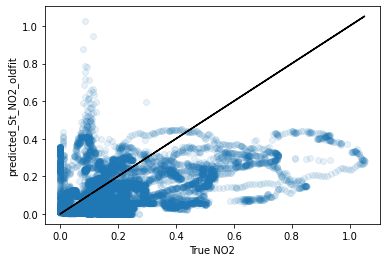

Spearman correlation: 0.2567131933588435
Pearson correlation: 0.48610756077482187


In [15]:
from matplotlib import pyplot as plt
import scipy.stats

FILTER = np.array(df["Oxygen"]) > 3
plt.scatter(df["NO2"][FILTER], df["predicted_St_NO2_oldfit"][FILTER],
            alpha=0.1)
plt.plot(df["NO2"][FILTER], df["NO2"][FILTER], color="black") #x=y line
plt.xlabel("True NO2")
plt.ylabel("predicted_St_NO2_oldfit")
plt.show()
print("Spearman correlation:", scipy.stats.spearmanr(
       df["NO2"][FILTER], df["predicted_St_NO2_oldfit"][FILTER])[0])
print("Pearson correlation:", scipy.stats.pearsonr(
       df["NO2"][FILTER], df["predicted_St_NO2_oldfit"][FILTER])[0])

Let's explore what the performance *could* be, using gradient-boosted regressors. We'll use some stations as the training dataset and other stations as the testing dataset. We will also explore different orders of interaction; the `max_depth` parameter of a gradient-boosted regressor controls the maximum order of interaction terms (so `max_depth=4` can learn fourth-order interactions)

In [16]:
!pip install shap

     |████████████████████████████████| 358kB 8.0MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489391 sha256=7023fb04499d79048bc3cd7e7becaae6b4f5e81097e1fcab519e93dfa7d4796a
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


Fitting models with max_depth: 4
On outer cv split 1
Fitting model
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


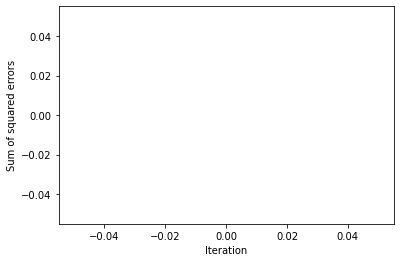

Best n_estimators found via cross-validation: 200


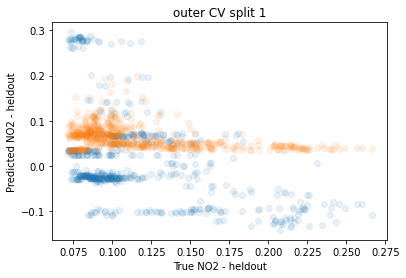

Getting explanations
On outer cv split 2
Fitting model
On inner cv split 1
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


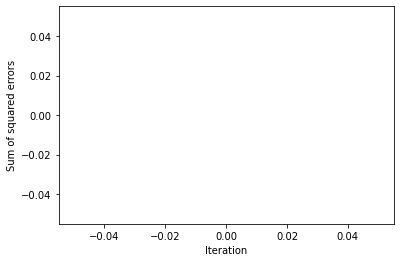

Best n_estimators found via cross-validation: 200


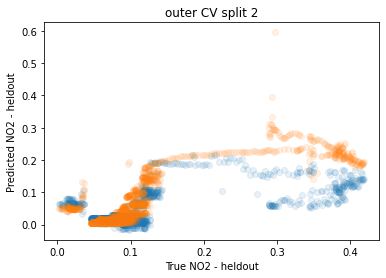

Getting explanations
On outer cv split 3
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


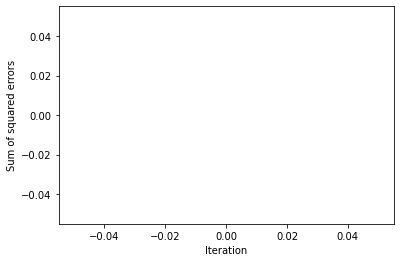

Best n_estimators found via cross-validation: 200


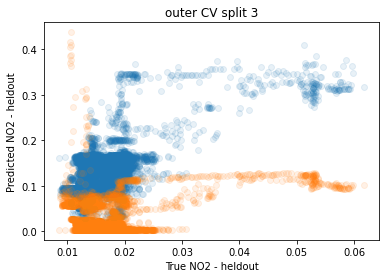

Getting explanations
On outer cv split 4
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


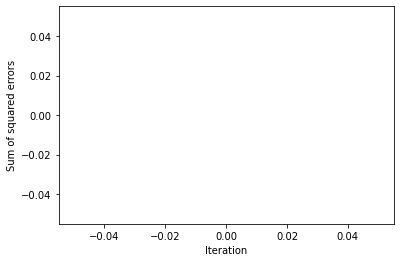

Best n_estimators found via cross-validation: 200


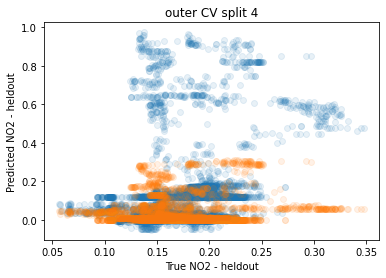

Getting explanations
On outer cv split 5
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


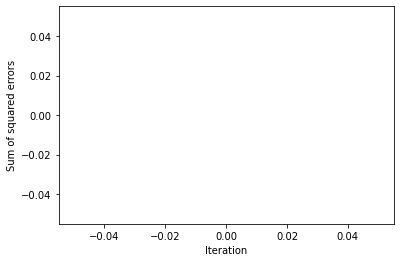

Best n_estimators found via cross-validation: 200


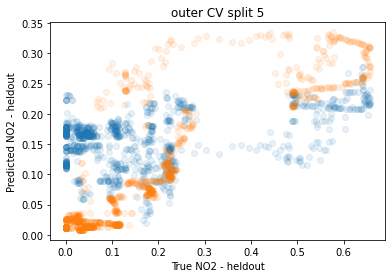

Getting explanations
On outer cv split 6
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


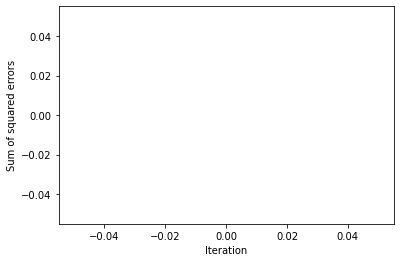

Best n_estimators found via cross-validation: 200


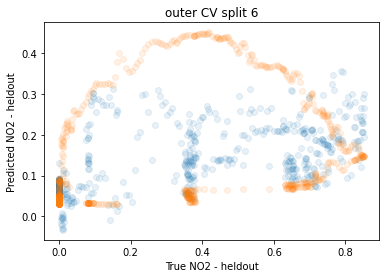

Getting explanations
On outer cv split 7
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


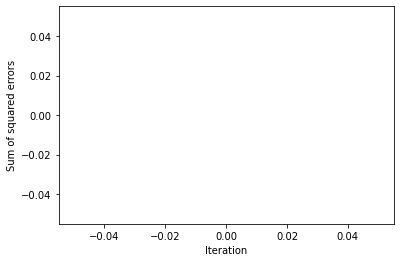

Best n_estimators found via cross-validation: 200


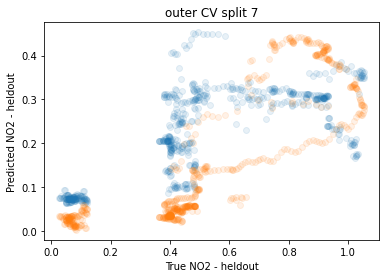

Getting explanations
On outer cv split 8
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


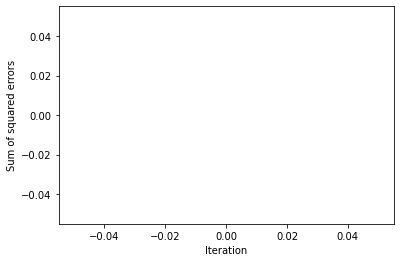

Best n_estimators found via cross-validation: 200


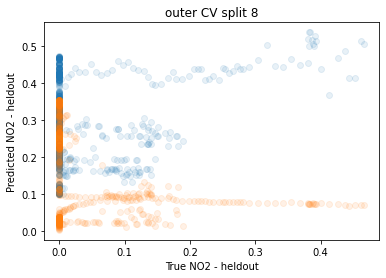

Getting explanations
On outer cv split 10
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


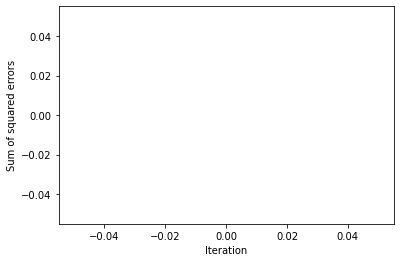

Best n_estimators found via cross-validation: 200


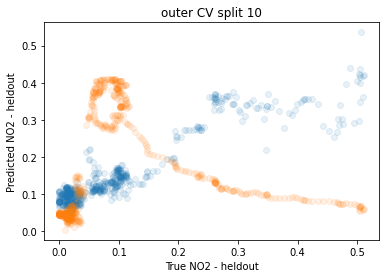

Getting explanations
On outer cv split 11
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


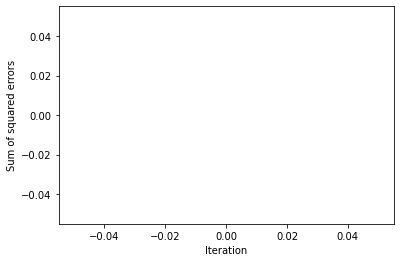

Best n_estimators found via cross-validation: 200


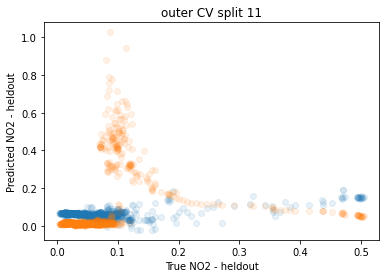

Getting explanations
On outer cv split 12
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


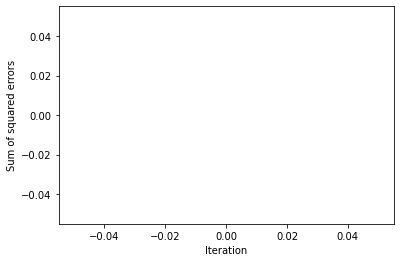

Best n_estimators found via cross-validation: 200


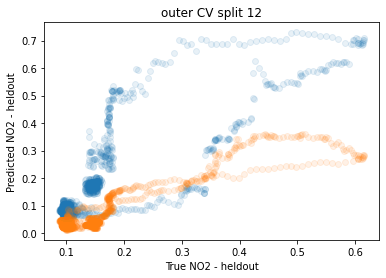

Getting explanations
On outer cv split 13
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 14
On inner cv split 15
On inner cv split 16


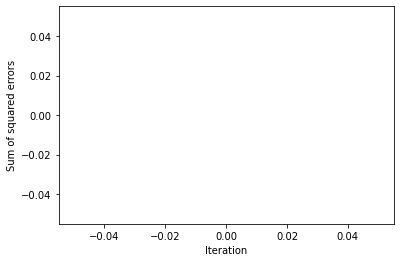

Best n_estimators found via cross-validation: 200


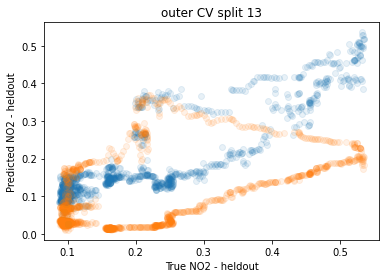

Getting explanations
On outer cv split 14
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 15
On inner cv split 16


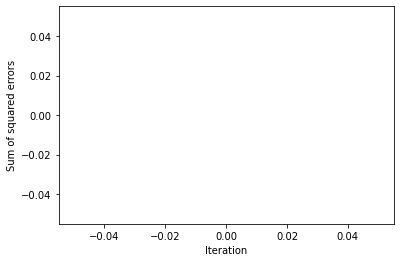

Best n_estimators found via cross-validation: 200


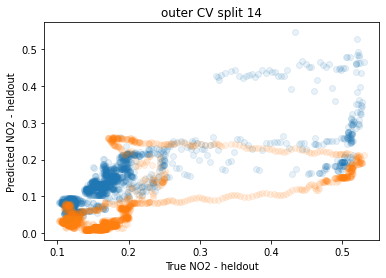

Getting explanations
On outer cv split 15
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 16


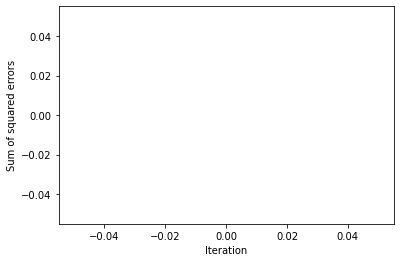

Best n_estimators found via cross-validation: 200


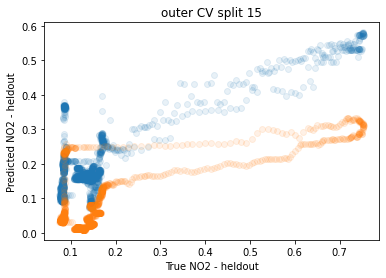

Getting explanations
On outer cv split 16
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15


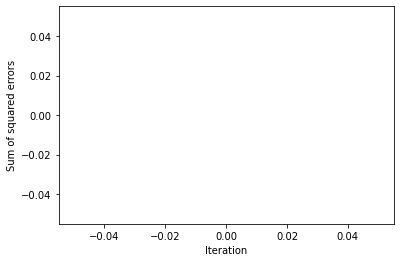

Best n_estimators found via cross-validation: 200


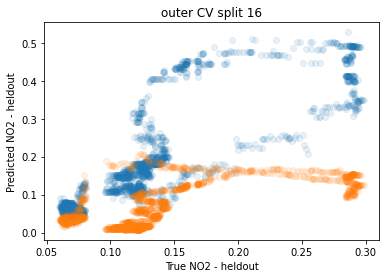

Getting explanations


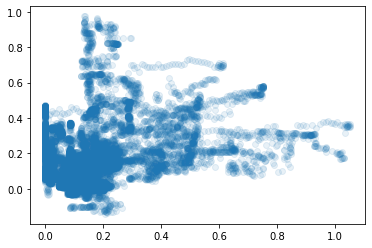

Fitting models with max_depth: 3
On outer cv split 1
Fitting model
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


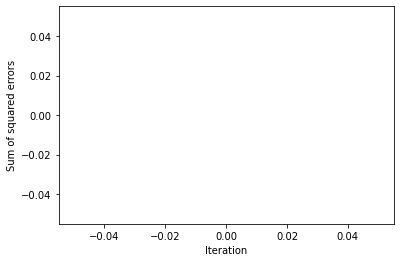

Best n_estimators found via cross-validation: 200


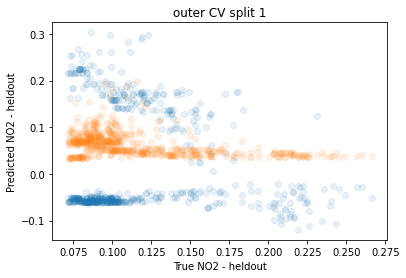

Getting explanations
On outer cv split 2
Fitting model
On inner cv split 1
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


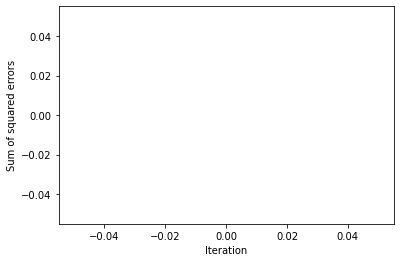

Best n_estimators found via cross-validation: 200


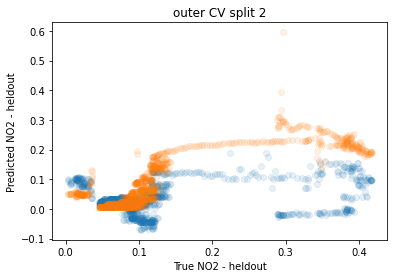

Getting explanations
On outer cv split 3
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


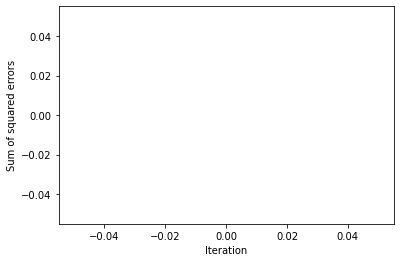

Best n_estimators found via cross-validation: 200


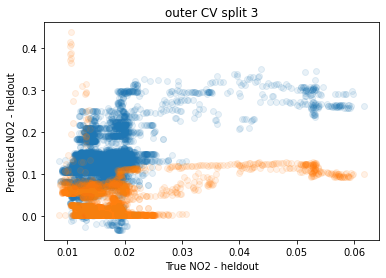

Getting explanations
On outer cv split 4
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


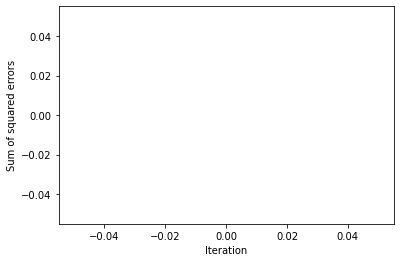

Best n_estimators found via cross-validation: 200


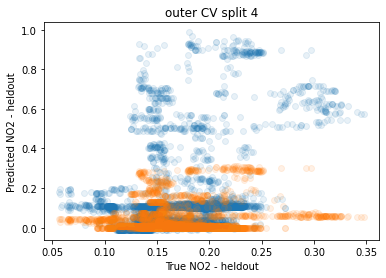

Getting explanations
On outer cv split 5
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


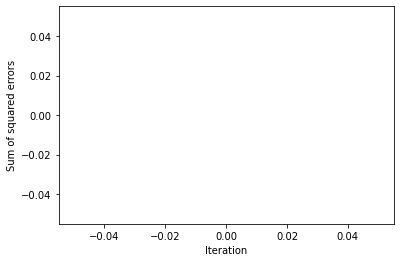

Best n_estimators found via cross-validation: 200


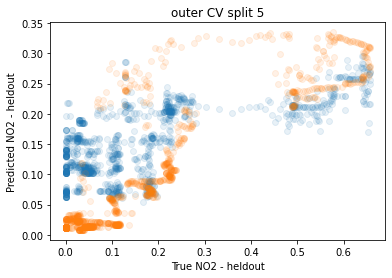

Getting explanations
On outer cv split 6
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


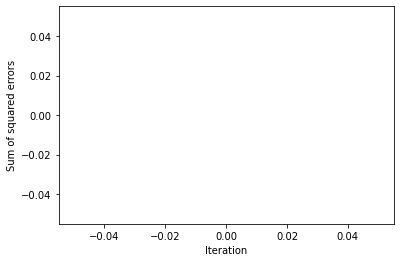

Best n_estimators found via cross-validation: 200


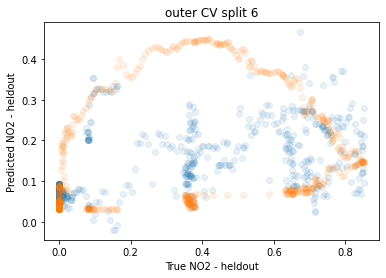

Getting explanations
On outer cv split 7
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


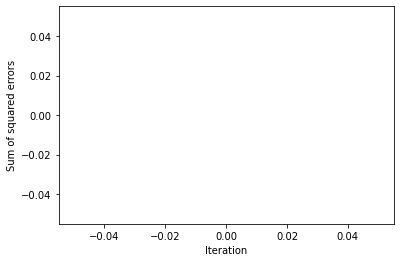

Best n_estimators found via cross-validation: 200


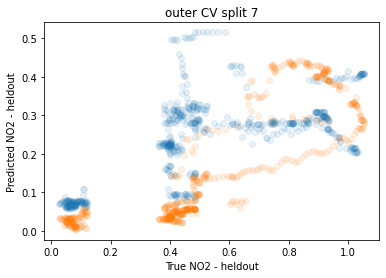

Getting explanations
On outer cv split 8
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


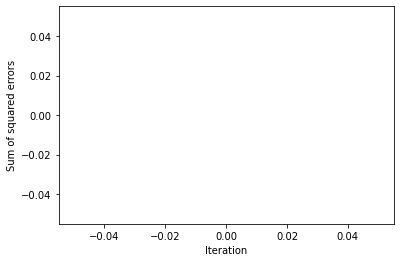

Best n_estimators found via cross-validation: 200


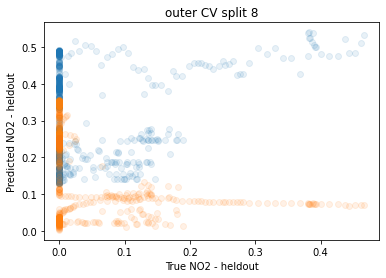

Getting explanations
On outer cv split 10
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


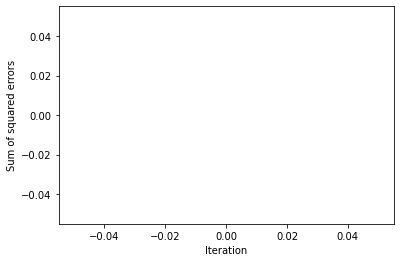

Best n_estimators found via cross-validation: 200


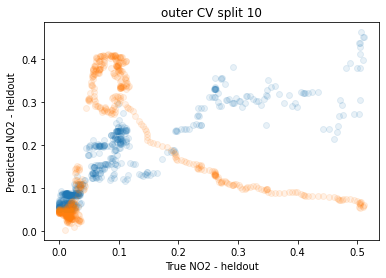

Getting explanations
On outer cv split 11
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


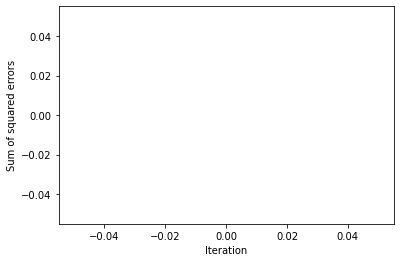

Best n_estimators found via cross-validation: 200


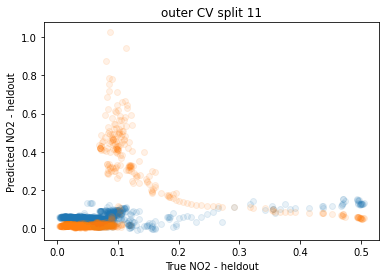

Getting explanations
On outer cv split 12
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


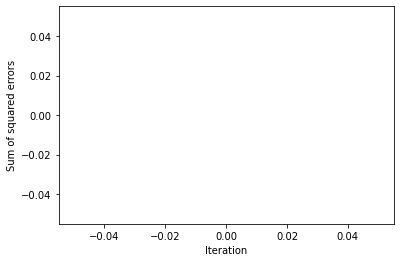

Best n_estimators found via cross-validation: 200


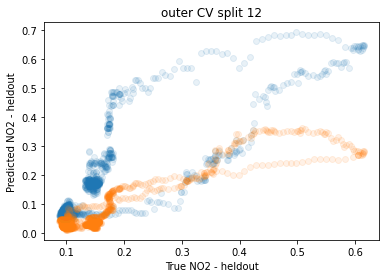

Getting explanations
On outer cv split 13
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 14
On inner cv split 15
On inner cv split 16


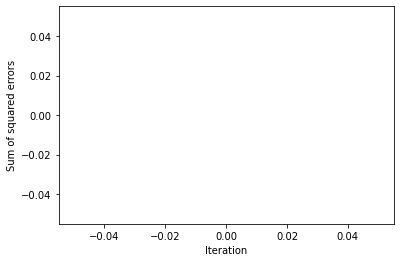

Best n_estimators found via cross-validation: 200


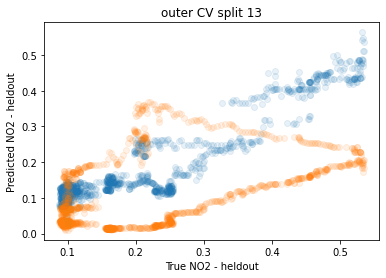

Getting explanations
On outer cv split 14
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 15
On inner cv split 16


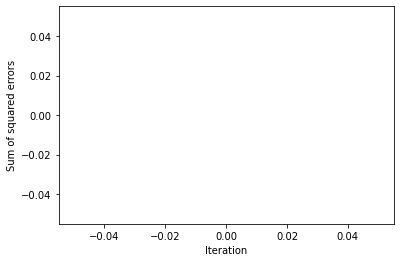

Best n_estimators found via cross-validation: 200


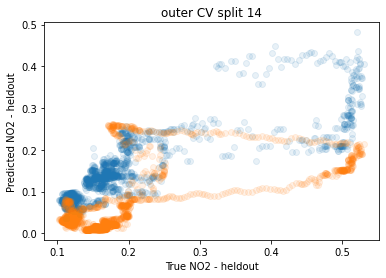

Getting explanations
On outer cv split 15
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 16


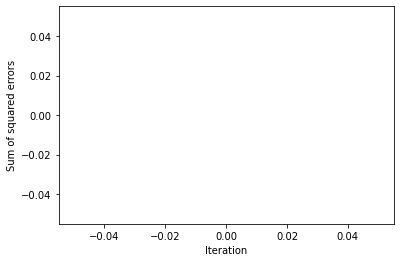

Best n_estimators found via cross-validation: 200


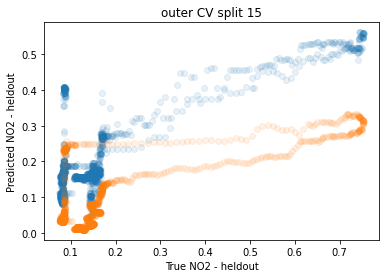

Getting explanations
On outer cv split 16
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15


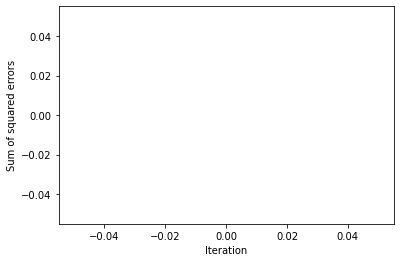

Best n_estimators found via cross-validation: 200


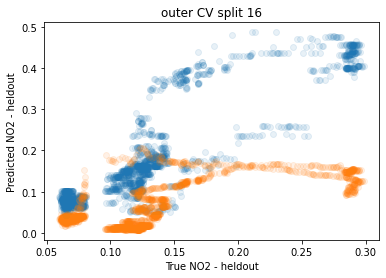

Getting explanations


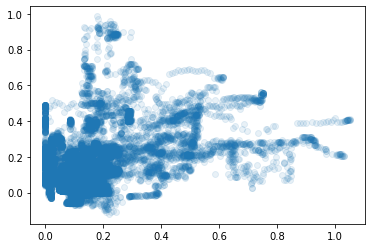

Fitting models with max_depth: 2
On outer cv split 1
Fitting model
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


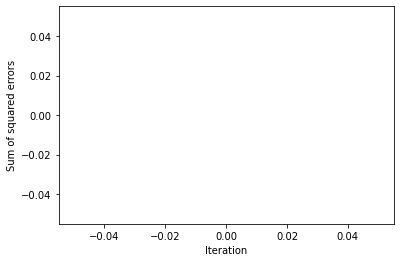

Best n_estimators found via cross-validation: 200


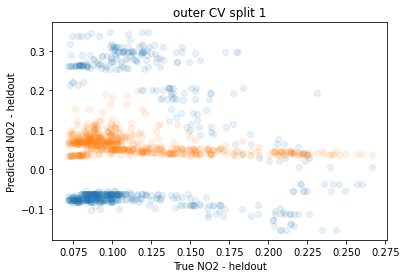

Getting explanations
On outer cv split 2
Fitting model
On inner cv split 1
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


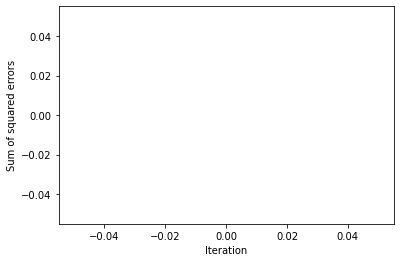

Best n_estimators found via cross-validation: 200


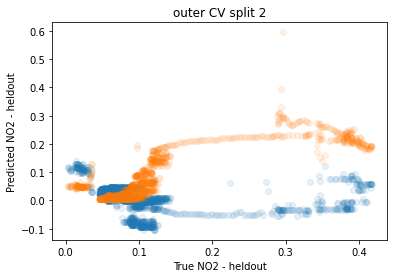

Getting explanations
On outer cv split 3
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


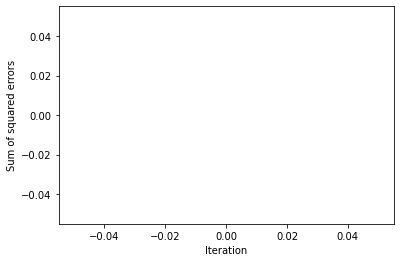

Best n_estimators found via cross-validation: 200


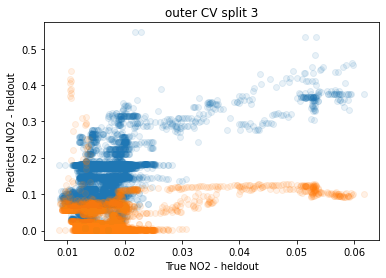

Getting explanations
On outer cv split 4
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


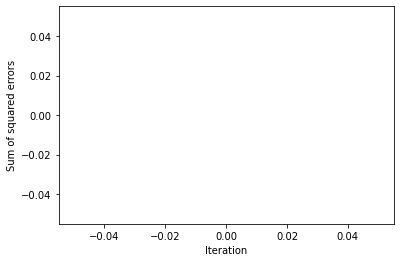

Best n_estimators found via cross-validation: 200


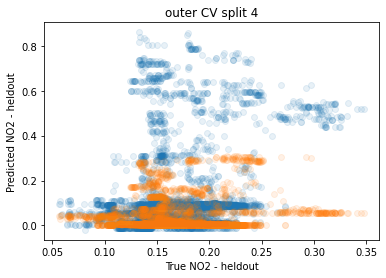

Getting explanations
On outer cv split 5
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


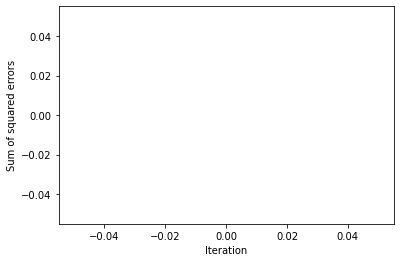

Best n_estimators found via cross-validation: 200


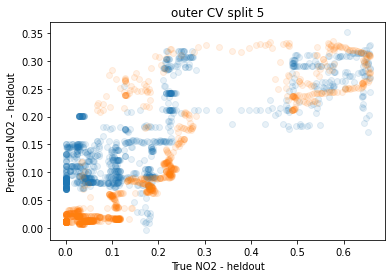

Getting explanations
On outer cv split 6
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


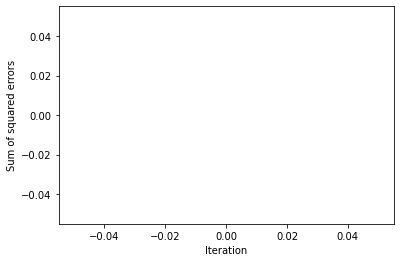

Best n_estimators found via cross-validation: 200


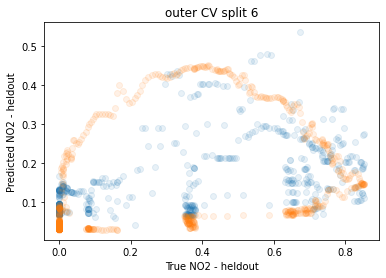

Getting explanations
On outer cv split 7
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


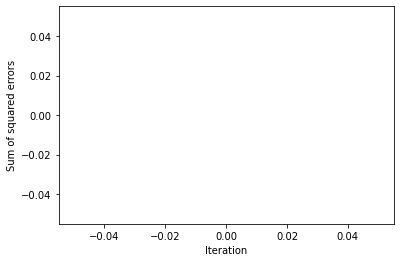

Best n_estimators found via cross-validation: 200


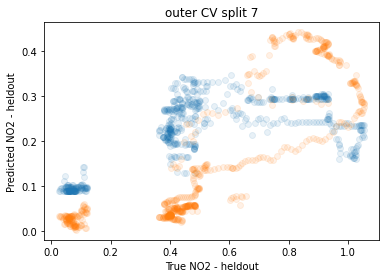

Getting explanations
On outer cv split 8
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


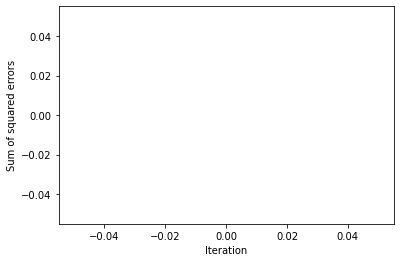

Best n_estimators found via cross-validation: 200


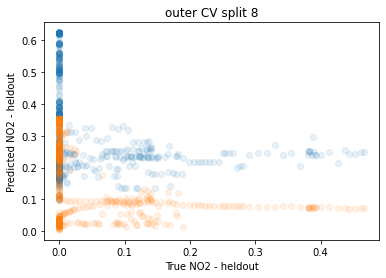

Getting explanations
On outer cv split 10
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


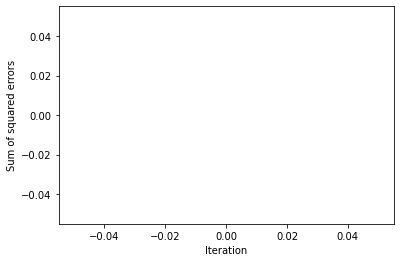

Best n_estimators found via cross-validation: 200


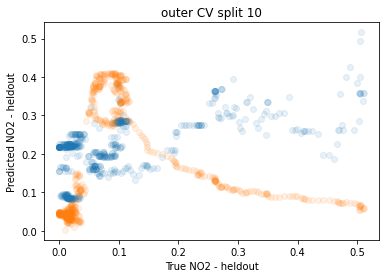

Getting explanations
On outer cv split 11
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


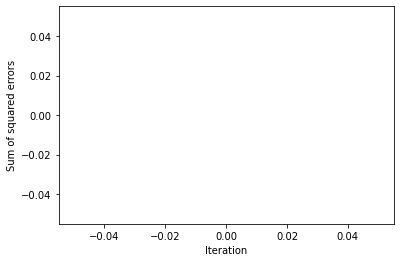

Best n_estimators found via cross-validation: 200


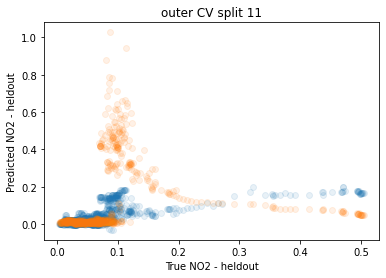

Getting explanations
On outer cv split 12
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


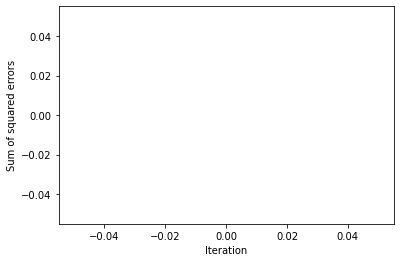

Best n_estimators found via cross-validation: 200


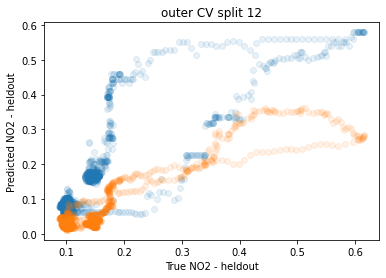

Getting explanations
On outer cv split 13
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 14
On inner cv split 15
On inner cv split 16


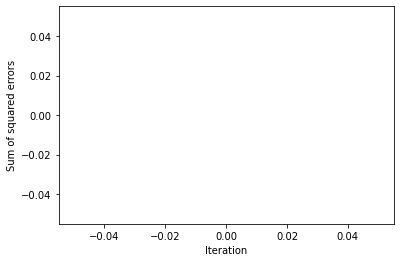

Best n_estimators found via cross-validation: 200


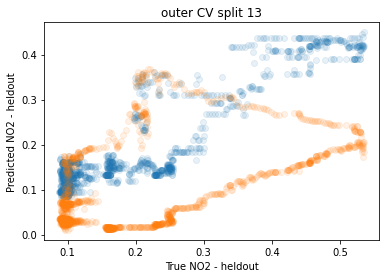

Getting explanations
On outer cv split 14
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 15
On inner cv split 16


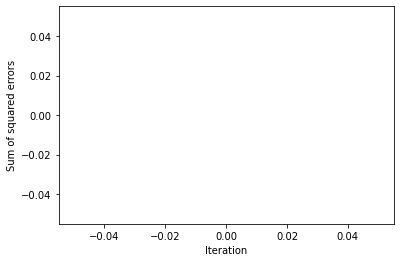

Best n_estimators found via cross-validation: 200


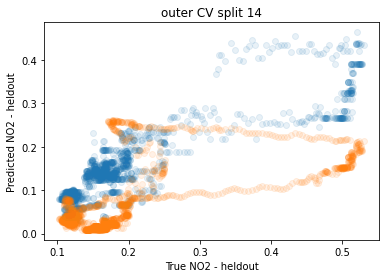

Getting explanations
On outer cv split 15
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 16


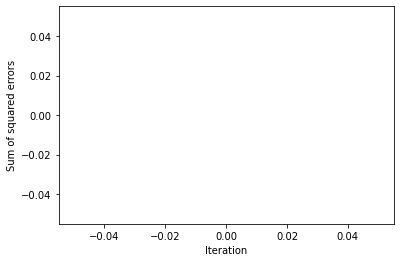

Best n_estimators found via cross-validation: 200


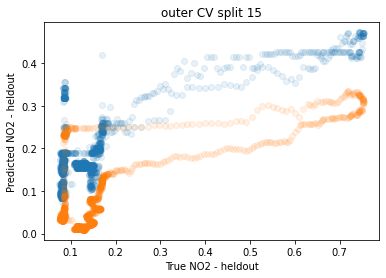

Getting explanations
On outer cv split 16
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15


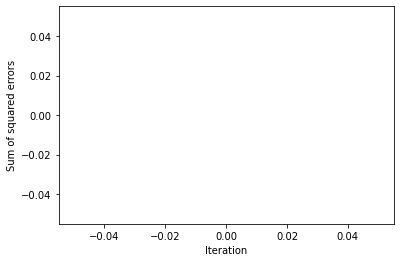

Best n_estimators found via cross-validation: 200


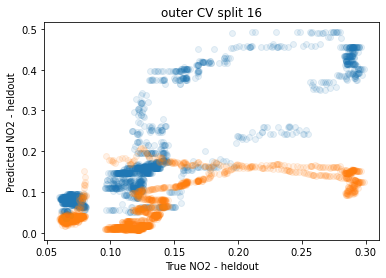

Getting explanations


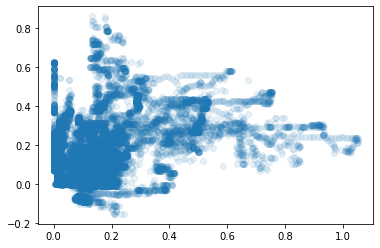

Fitting models with max_depth: 1
On outer cv split 1
Fitting model
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


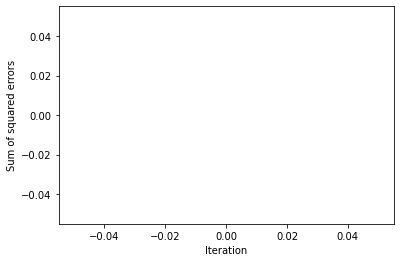

Best n_estimators found via cross-validation: 200


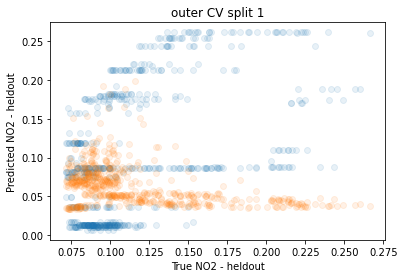

Getting explanations
On outer cv split 2
Fitting model
On inner cv split 1
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


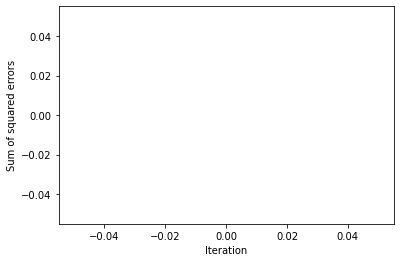

Best n_estimators found via cross-validation: 200


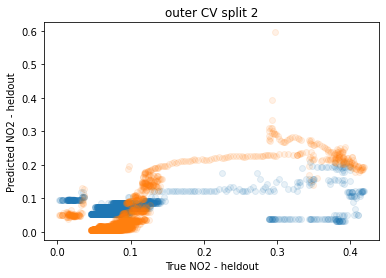

Getting explanations
On outer cv split 3
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


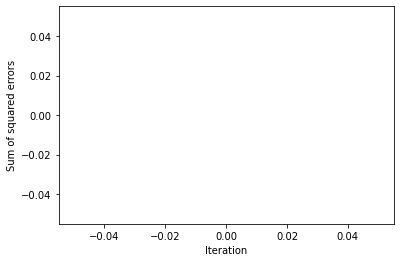

Best n_estimators found via cross-validation: 200


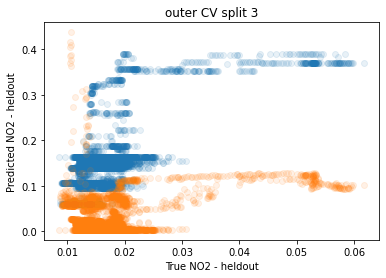

Getting explanations
On outer cv split 4
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


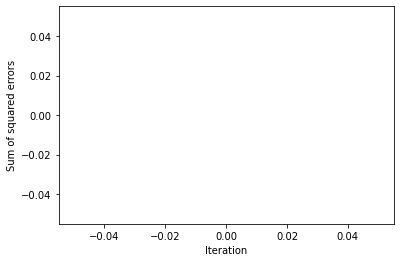

Best n_estimators found via cross-validation: 200


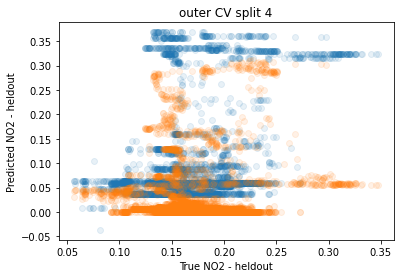

Getting explanations
On outer cv split 5
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


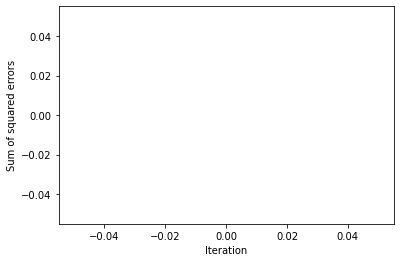

Best n_estimators found via cross-validation: 200


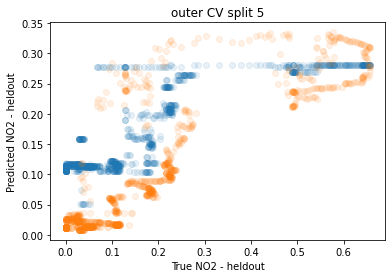

Getting explanations
On outer cv split 6
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


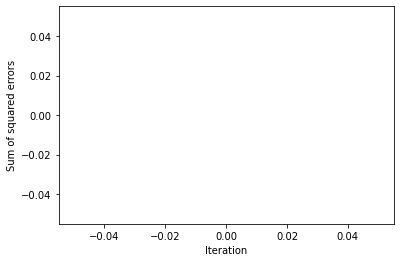

Best n_estimators found via cross-validation: 200


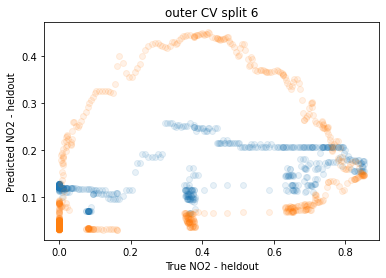

Getting explanations
On outer cv split 7
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


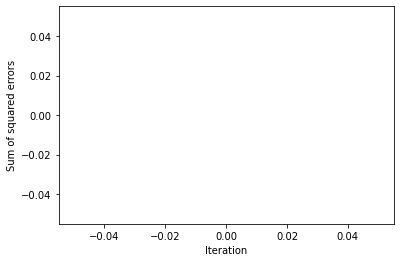

Best n_estimators found via cross-validation: 200


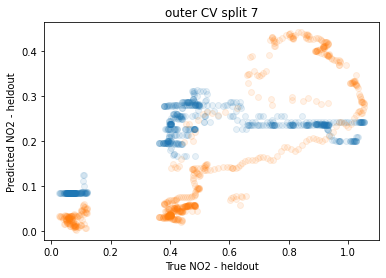

Getting explanations
On outer cv split 8
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


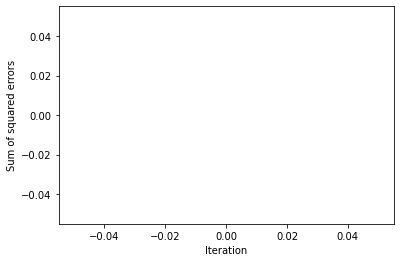

Best n_estimators found via cross-validation: 200


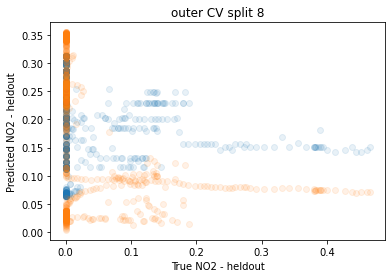

Getting explanations
On outer cv split 10
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


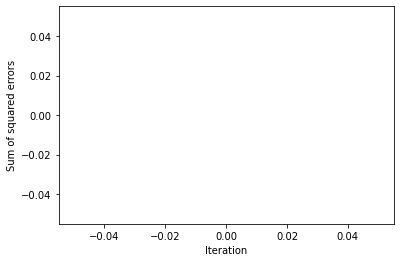

Best n_estimators found via cross-validation: 200


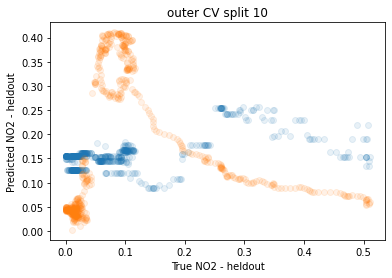

Getting explanations
On outer cv split 11
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


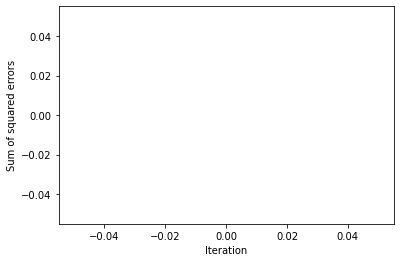

Best n_estimators found via cross-validation: 200


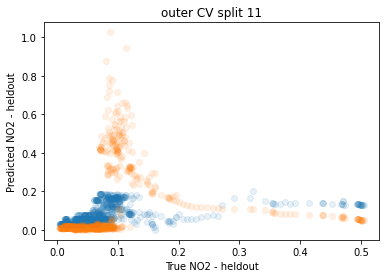

Getting explanations
On outer cv split 12
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 13
On inner cv split 14
On inner cv split 15
On inner cv split 16


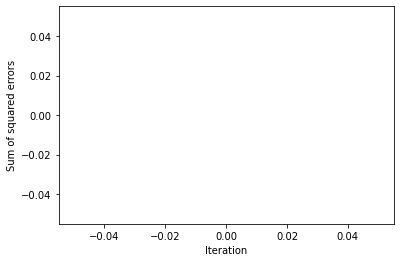

Best n_estimators found via cross-validation: 200


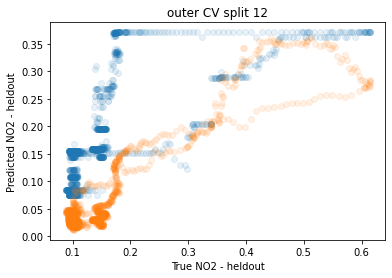

Getting explanations
On outer cv split 13
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 14
On inner cv split 15
On inner cv split 16


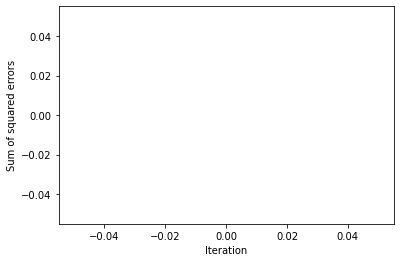

Best n_estimators found via cross-validation: 200


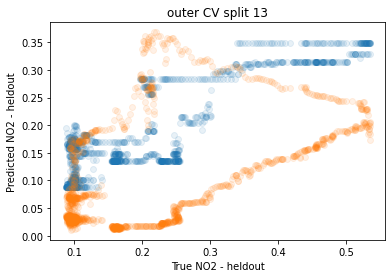

Getting explanations
On outer cv split 14
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 15
On inner cv split 16


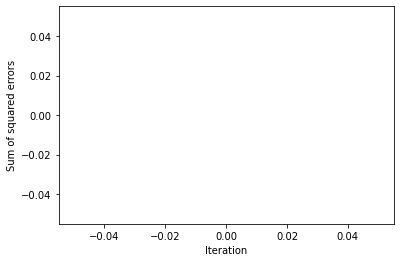

Best n_estimators found via cross-validation: 200


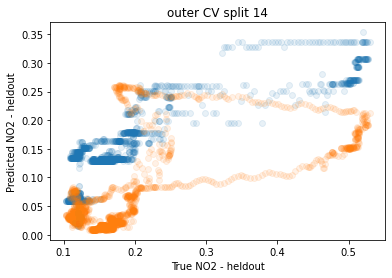

Getting explanations
On outer cv split 15
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 16


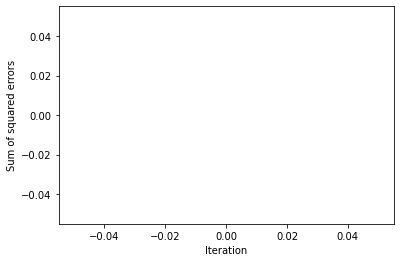

Best n_estimators found via cross-validation: 200


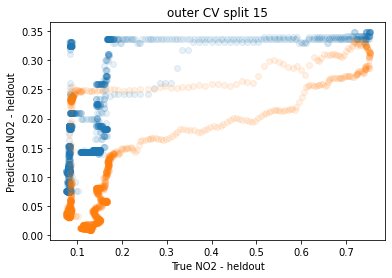

Getting explanations
On outer cv split 16
Fitting model
On inner cv split 1
On inner cv split 2
On inner cv split 3
On inner cv split 4
On inner cv split 5
On inner cv split 6
On inner cv split 7
On inner cv split 8
On inner cv split 10
On inner cv split 11
On inner cv split 12
On inner cv split 13
On inner cv split 14
On inner cv split 15


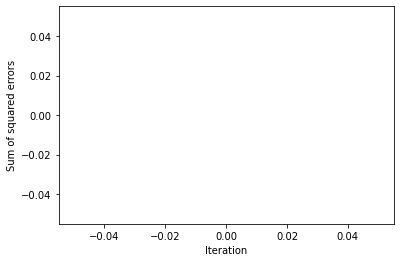

Best n_estimators found via cross-validation: 200


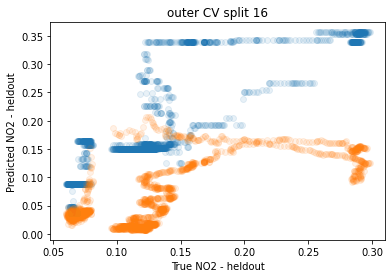

Getting explanations


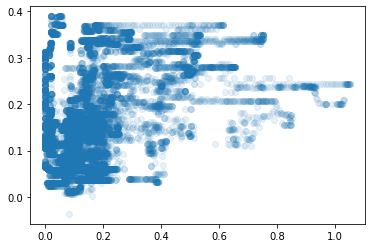

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pyplot as plt
import shap


def train_gb_regressor(train_features, train_labels,
                       cv_split_idxs, max_depth,
                       estimators_per_iter=200, num_iters=0):
  #Use the cv_splits to determine the n_estimators hyperparameter
  #each iteration, we train "estimators_per_iter" more estimators
  cv_split_idxs_set = sorted(set(cv_split_idxs))
  num_cv_splits = len(cv_split_idxs_set)
  cv_iter_scores = np.zeros((num_cv_splits, num_iters))
  cv_iter_train_scores = np.zeros((num_cv_splits, num_iters))
  for cv_split_remapped, cv_split in enumerate(cv_split_idxs_set):
    print("On inner cv split",cv_split)
    split_train_features = train_features[(cv_split_idxs==cv_split)==False]
    split_train_labels = train_labels[(cv_split_idxs==cv_split)==False]
    split_test_features = train_features[(cv_split_idxs==cv_split)]
    split_test_labels = train_labels[(cv_split_idxs==cv_split)]
    model = GradientBoostingRegressor(
           random_state=1234, loss='ls',
           max_depth=max_depth,
           n_estimators=0, #need to keep incrementing this
           warm_start=True)
    for iter in range(num_iters):
      model.n_estimators += estimators_per_iter
      model = model.fit(split_train_features, split_train_labels)
      iter_preds = model.predict(split_test_features)
      iter_train_preds = model.predict(split_train_features)
      #Let the score be the sum of squared errors. Note: important to use
      # sum rather than the mean in order to combine across folds that may
      # be of different sizes.
      score = np.sum(np.square(split_test_labels-iter_preds))
      train_score = np.sum(np.square(split_train_labels-iter_train_preds))
      cv_iter_scores[cv_split_remapped, iter] = score
      cv_iter_train_scores[cv_split_remapped, iter] = train_score
      #print(cv_split_remapped, iter, score)
    #plt.scatter(split_test_labels, model.predict(split_test_features))
    #plt.title("inner CV split "+str(cv_split))
    #plt.xlabel("True NO2 - heldout")
    #plt.ylabel("Predicted NO2 - heldout")
    #plt.show()
    #plt.scatter(split_train_labels, model.predict(split_train_features))
    #plt.title("inner CV split "+str(cv_split))
    #plt.xlabel("True NO2 - train")
    #plt.ylabel("Predicted NO2 - train")
    #plt.show()
    plt.plot((np.arange(num_iters)+1)*estimators_per_iter,
             cv_iter_scores[cv_split_remapped],
             color="C"+str(cv_split_remapped))
    plt.plot((np.arange(num_iters)+1)*estimators_per_iter,
             cv_iter_train_scores[cv_split_remapped],
             color="C"+str(cv_split_remapped),
             linestyle="--")
  plt.ylabel("Sum of squared errors")
  plt.xlabel("Iteration")
  plt.show()
  if (num_iters==0): #hack for basically no inner cv loop:
    best_iter=0
  else:
    best_iter = np.argmin(np.mean(cv_iter_scores, axis=0))
  best_n_estimators = (best_iter+1)*estimators_per_iter
  print("Best n_estimators found via cross-validation:", best_n_estimators)
  return GradientBoostingRegressor(
           random_state=1234, loss='ls',
           max_depth=max_depth,
           n_estimators=estimators_per_iter).fit(train_features, train_labels)


def perform_outer_cv_loop(features, labels, outer_cv_splitidxs,
                          inner_cv_function, nicole_old_preds):
  outer_cv_splits = sorted(set(outer_cv_splitidxs))
  outercv_split_models = []
  preds = np.zeros(len(labels))
  explanations = np.zeros_like(features)
  for outer_cv_split in outer_cv_splits:
    print("On outer cv split", outer_cv_split)
    train_features = features[(outer_cv_splitidxs==outer_cv_split)==False]
    train_labels = labels[(outer_cv_splitidxs==outer_cv_split)==False]
    cv_split_idxs = outer_cv_splitidxs[(outer_cv_splitidxs==outer_cv_split)
                                        ==False]
    print("Fitting model")
    model = inner_cv_function(train_features, train_labels,
                              cv_split_idxs)
    outercv_split_models.append(model)
    test_features = features[(outer_cv_splitidxs==outer_cv_split)]
    test_labels = labels[(outer_cv_splitidxs==outer_cv_split)]
    test_preds = model.predict(test_features)
    preds[(outer_cv_splitidxs==outer_cv_split)] = test_preds
    plt.scatter(test_labels, test_preds, alpha=0.1)
    plt.scatter(test_labels,
                nicole_old_preds[(outer_cv_splitidxs==outer_cv_split)],
                alpha=0.1)
    plt.title("outer CV split "+str(outer_cv_split))
    plt.xlabel("True NO2 - heldout")
    plt.ylabel("Predicted NO2 - heldout")
    plt.show()
    print("Getting explanations")
    #get explanations
    explainer = shap.TreeExplainer(model)
    explanations[(outer_cv_splitidxs==outer_cv_split)] =\
      explainer.shap_values(test_features)
  return preds, explanations, outercv_split_models


def run_different_maxdepths(features, labels, outer_cv_splitidxs):
  maxdepth_to_preds = {}
  maxdepth_to_explanations = {}
  maxdepth_to_models = {}
  for max_depth in [4,3,2,1]:
    print("Fitting models with max_depth:", max_depth)
    #define the inner cv function for this value of max_depth
    def inner_cv_function(features, labels, cv_split_idxs):
      return train_gb_regressor(train_features=features,
                                train_labels=labels,
                                cv_split_idxs=cv_split_idxs,
                                max_depth=max_depth)
      
    preds_thisdepth, explanations_thisdepth, models_thisdepth =\
      perform_outer_cv_loop(features=features,
              labels=labels,
              outer_cv_splitidxs=outer_cv_splitidxs,
              inner_cv_function=inner_cv_function,
              nicole_old_preds=np.array(df["predicted_St_NO2_oldfit"][FILTER]))
    
    #plot the result
    plt.scatter(labels, preds_thisdepth, alpha=0.1)
    plt.show()

    maxdepth_to_preds[max_depth] = preds_thisdepth
    maxdepth_to_explanations[max_depth] = explanations_thisdepth
    maxdepth_to_models[max_depth] = models_thisdepth
  return maxdepth_to_preds, maxdepth_to_explanations, maxdepth_to_models


#Now let's extract temp/sal/chl/PAR/NO3/NO2/NH4 and pH as features.
#Everything except NO2 included here
feature_cols = ["TempC", "Salinity", "Chl_SP", "pPAR", "NO3",
                "NH4", "pH", "Oxygen"]
features = np.array(df[feature_cols])[FILTER]
labels = np.array(df["NO2"])[FILTER]

#We need to set up both an outer CV loop and an inner CV loop.
#We can hold each station at a time for both the inner and outer loops
outer_cv_splitidxs = np.array(df["Station"][FILTER])
#outer_cv_splitidxs = np.floor(np.array(df["Station"][FILTER])/4.0).astype("int")

(maxdepth_to_preds, maxdepth_to_explanations, maxdepth_to_models) =\
  run_different_maxdepths(features=features, labels=labels,
                          outer_cv_splitidxs=outer_cv_splitidxs)


##There are 16 stations; let even stations be in the training set and
## odd stations in the testing set
#train_idxs = [idx for idx,station in enumerate(df["Station"][filter])
#              if station%2==0]
#test_idxs = [idx for idx,station in enumerate(df["Station"][filter])
#             if station%2==1]
#features_train, features_test = features[train_idxs], features[test_idxs]
#labels_train, labels_test = labels[train_idxs], labels[test_idxs]
#est = GradientBoostingRegressor(random_state=1234, loss='ls',
#                                max_depth=4, n_estimators=200).fit(
#                                features_train, labels_train)

In [67]:
!pip install fastcluster

     |████████████████████████████████| 163kB 8.9MB/s 


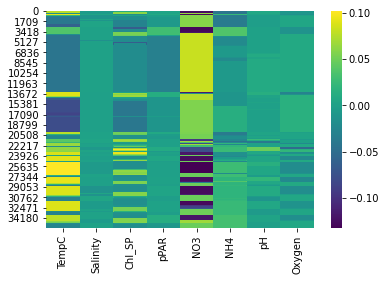

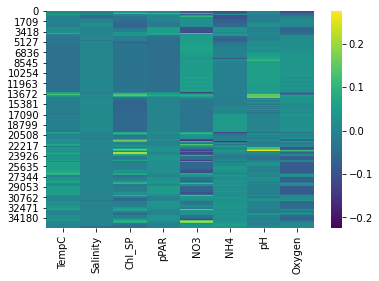

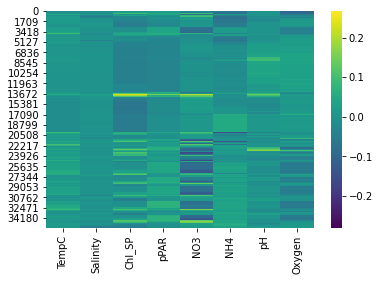

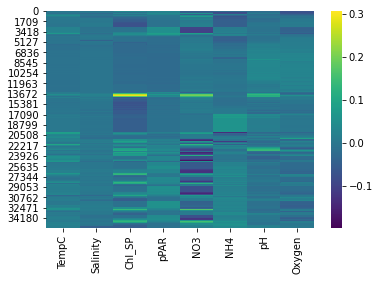

In [77]:
import seaborn as sns
for i in range(1,5):
  sns.heatmap(maxdepth_to_explanations[i],
              xticklabels=feature_cols,
              cmap="viridis")
  plt.show()

In [69]:
import numpy as np
import sklearn.manifold

#Normalize the variance of the features by dividing by standard deviation
varnorm_features = features/np.std(features, axis=0)[None,:]

subsample_factor = 1 #subsampling for speed

#Compute a t-sne embedding of the variance-normalized features; this implicitly
# uses euclidean distance. You can play with the perplexity parameter, which
# controls the size of the neighborhood around each point that is used to
# adapt the distances to the local density of the data (can explain this in
# more detail).
#This takes some time to run
tsne_embedding =\
  sklearn.manifold.TSNE(perplexity=500, verbose=3,
                        random_state=1234).fit_transform(
                            varnorm_features[::subsample_factor])

[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 35879 samples in 0.082s...
[t-SNE] Computed neighbors for 35879 samples in 20.253s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35879
[t-SNE] Computed conditional probabilities for sample 2000 / 35879
[t-SNE] Computed conditional probabilities for sample 3000 / 35879
[t-SNE] Computed conditional probabilities for sample 4000 / 35879
[t-SNE] Computed conditional probabilities for sample 5000 / 35879
[t-SNE] Computed conditional probabilities for sample 6000 / 35879
[t-SNE] Computed conditional probabilities for sample 7000 / 35879
[t-SNE] Computed conditional probabilities for sample 8000 / 35879
[t-SNE] Computed conditional probabilities for sample 9000 / 35879
[t-SNE] Computed conditional probabilities for sample 10000 / 35879
[t-SNE] Computed conditional probabilities for sample 11000 / 35879
[t-SNE] Computed conditional probabilities for sample 12000 / 35879
[t-SNE] Computed conditional probabilities for 

NO2


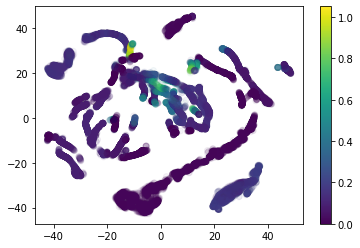

predicted_St_NO2_oldfit


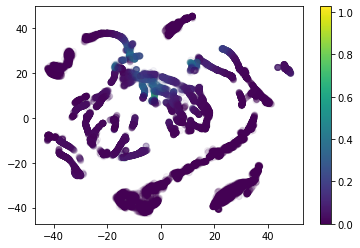

Station


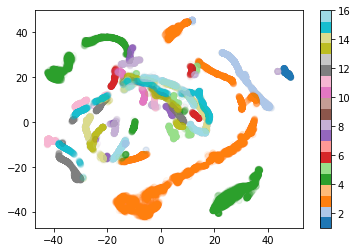

TempC


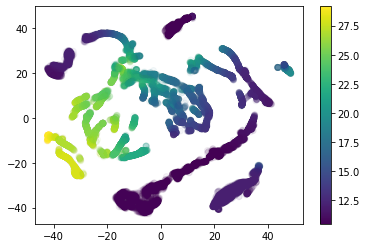

Salinity


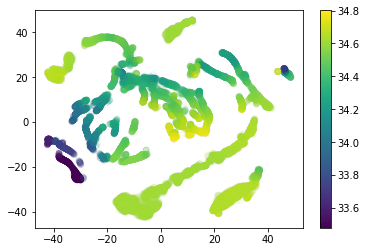

Chl_SP


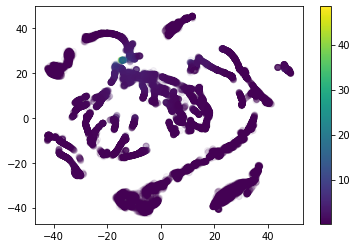

pPAR


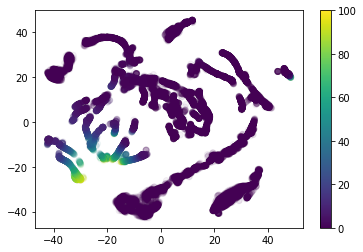

NO3


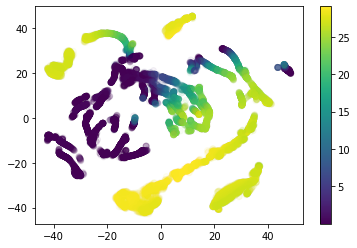

NH4


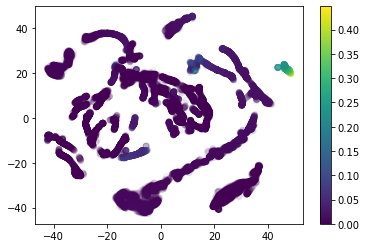

pH


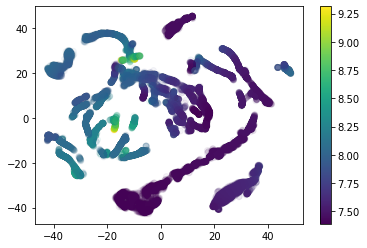

Oxygen


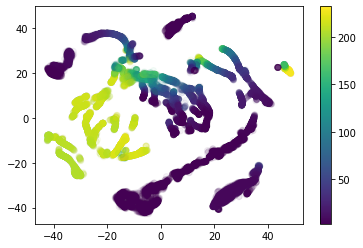

In [70]:
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt

for feature_name in ["NO2", "predicted_St_NO2_oldfit", "Station"]+feature_cols:
  print(feature_name)
  vals = (np.array(df[feature_name])[filter][::subsample_factor])
  #norm = mpl.colors.Normalize(vmin=np.percentile(vals, q=0),
  #                           vmax=np.percentile(vals, q=90))
  
  #sns.scatterplot(x=tsne_embedding[:,0], y=tsne_embedding[:,1],
  #                c=vals)
  #plt.show()

  plt.scatter(tsne_embedding[:,0], tsne_embedding[:,1], alpha=0.05,
              c=vals, #norm=norm
              cmap="tab20" if feature_name=="Station" else "viridis")
  cbar = plt.colorbar()
  cbar.set_alpha(1)
  cbar.draw_all()
  plt.show()

In [72]:
##save the t-sne embedding
np.save("PNM_tsne_perplexity500_no2min0.npy", tsne_embedding)